In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
import sys
import PIL
import scipy.stats as stats

In [50]:
#path_root = '/path//to//repository/'
path_root = '/Volumes/Shared279/OSSLAB_projectsShared/cyanoMotility_story/submission_eLIFE_VoR/'
base = 'data/0_all_data_summary'

df = pd.read_csv(path_root+ base+".csv",sep="\t")

df_values = df.iloc[:, 1:]
df_ids = df.iloc[:, 1]
summaryStats = df_values.to_numpy()
summaryStats[:,1]

len(summaryStats[:,1])

65

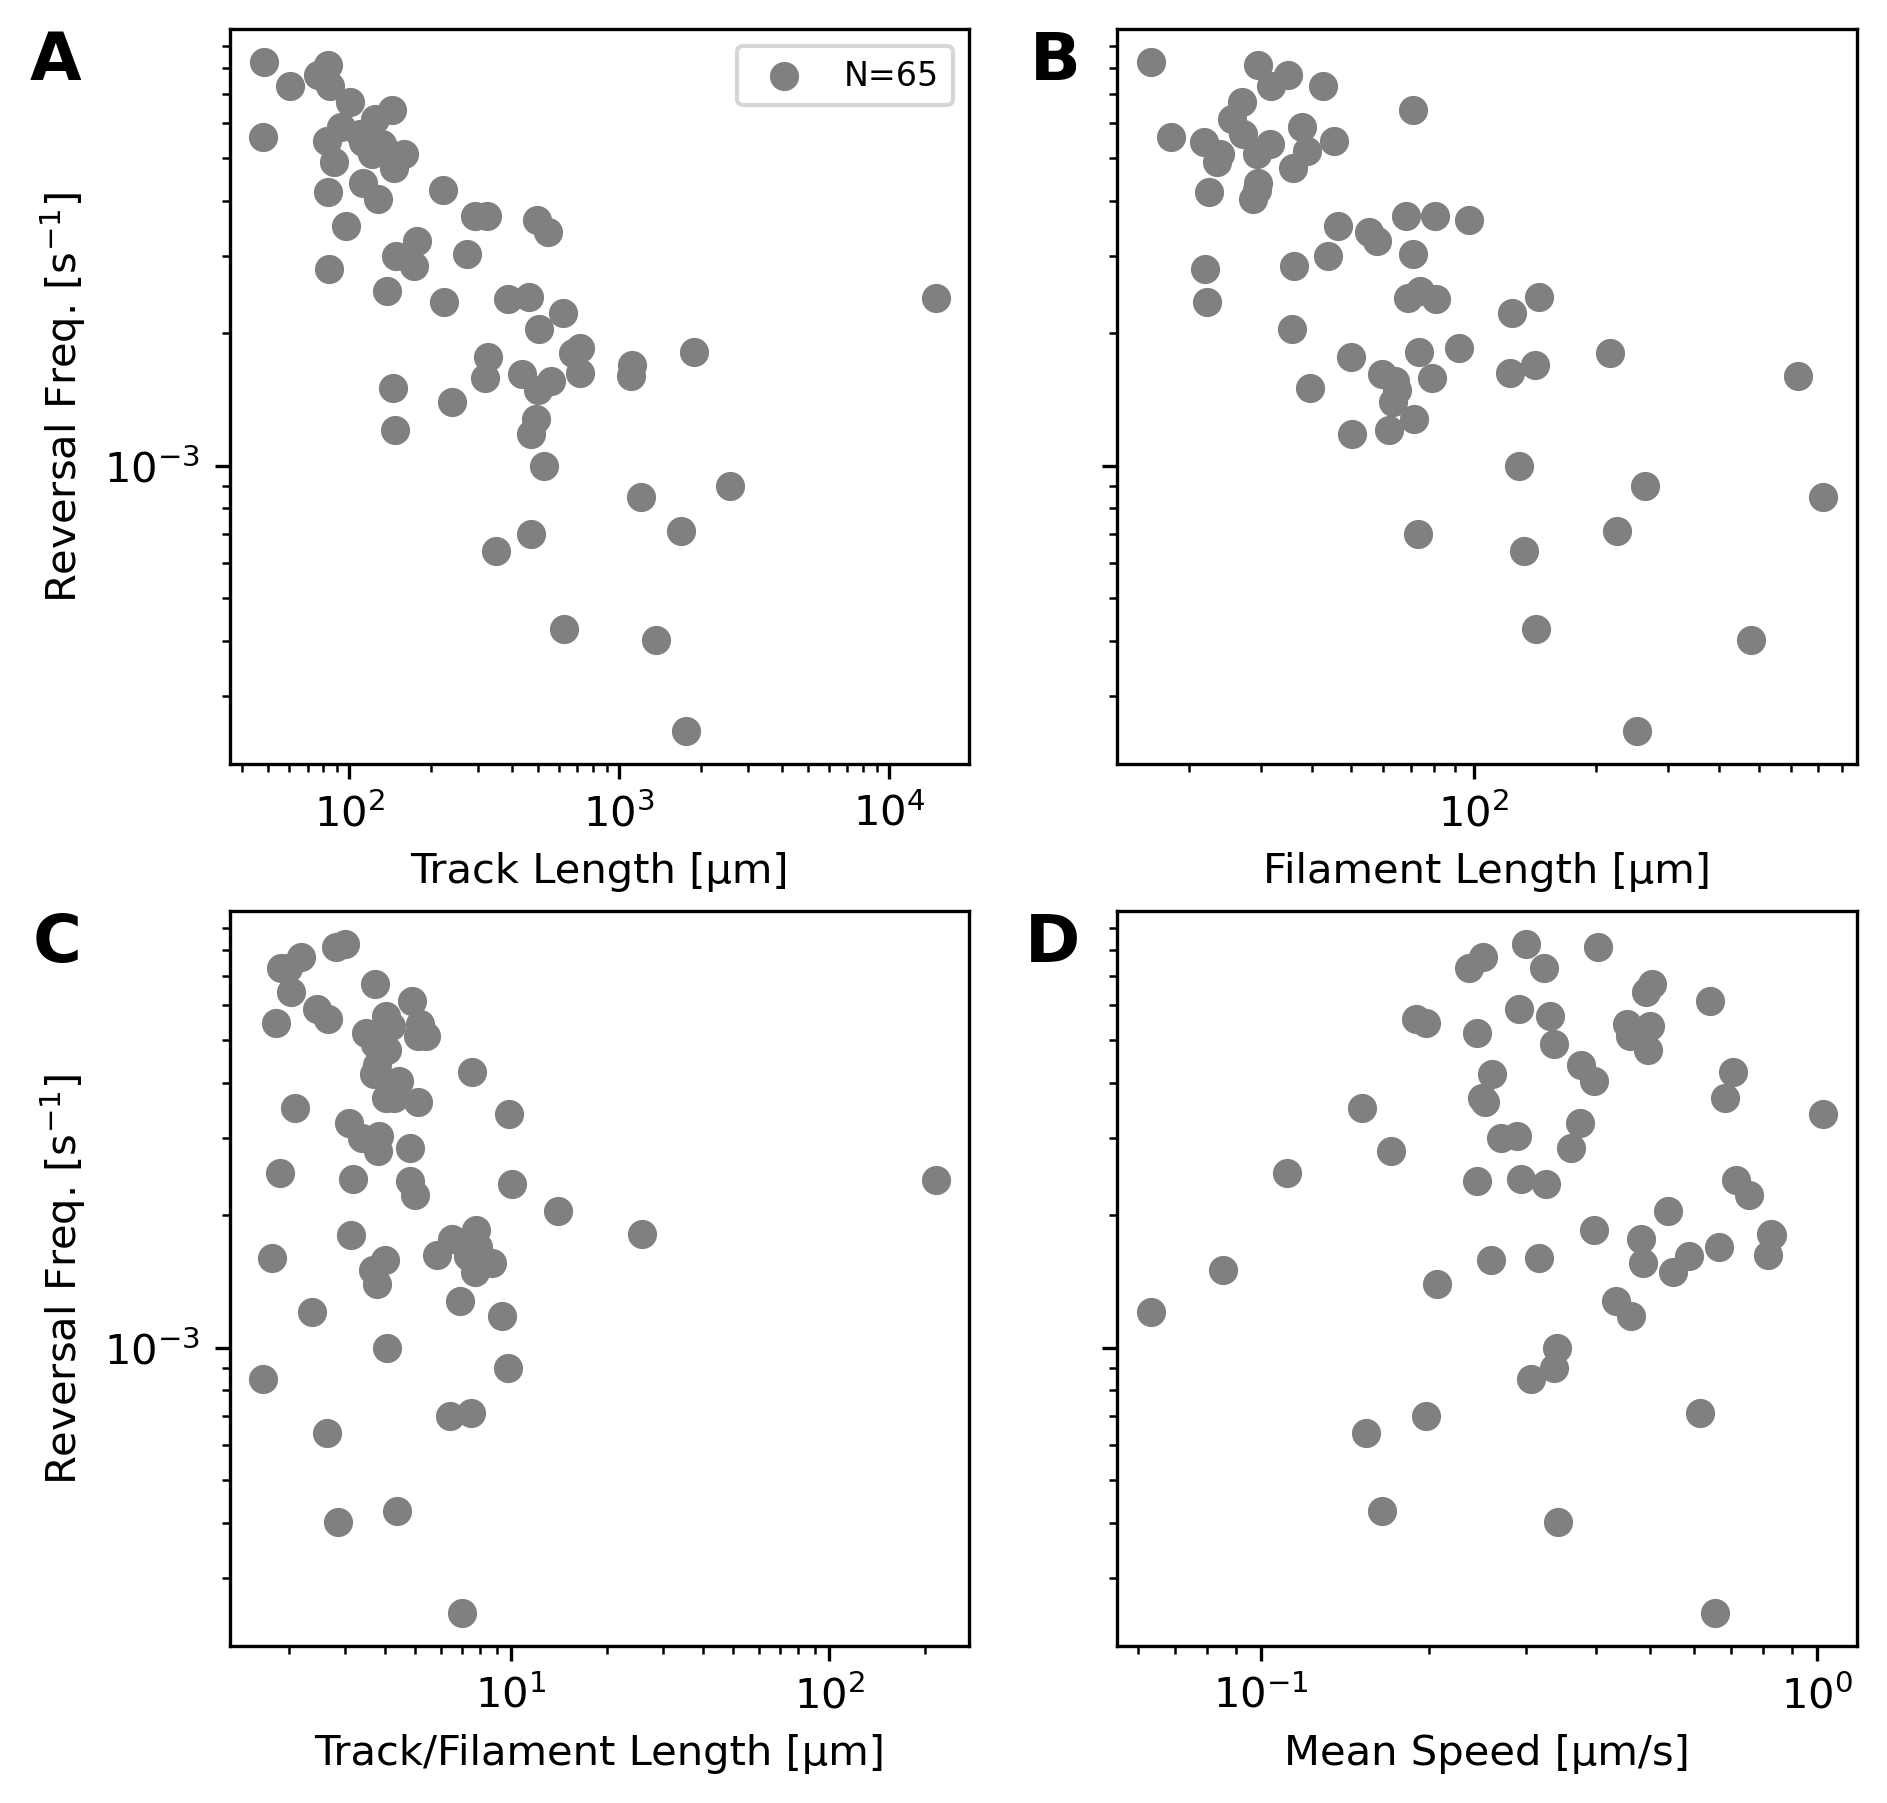

In [52]:
########
## PLOT REVERSAL FREQ AGAINST SPEED AND LENGTHS
######

#column 15: observation duration [s]
#cloumn 5: Nreversals observed
#column 3: Track length [um]
#column 2: Filament length [um]

revFreq = (summaryStats[:,5]/summaryStats[:,15])

fig, ax = plt.subplots(2,2, figsize=(7,7), dpi=300, sharey=True)

ax[0,0].scatter(summaryStats[:,3],revFreq,color='gray',label = 'N=65')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Track Length [μm]')
ax[0,0].set_ylabel(r'Reversal Freq. [s$^{-1}$]')
ax[0,0].legend(loc="upper right",fontsize=8)
ax[0,0].text(-0.2, 1, 'A', transform=ax[0,0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

ax[0,1].scatter(summaryStats[:,2],revFreq,color='gray')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Filament Length [μm]')
ax[0,1].text(-0.05, 1, 'B', transform=ax[0,1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

ax[1,0].scatter(summaryStats[:,3]/summaryStats[:,2],revFreq,color='gray')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('Track/Filament Length [μm]')
ax[1,0].set_ylabel(r'Reversal Freq. [s$^{-1}$]')
ax[1,0].text(-0.2, 1, 'C', transform=ax[1,0].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

ax[1,1].scatter(summaryStats[:,7],revFreq,color='gray')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Mean Speed [μm/s]')
ax[1,1].text(-0.05, 1, 'D', transform=ax[1,1].transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


#fig.savefig('Fig1_supplement1.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()
plt.close(fig)

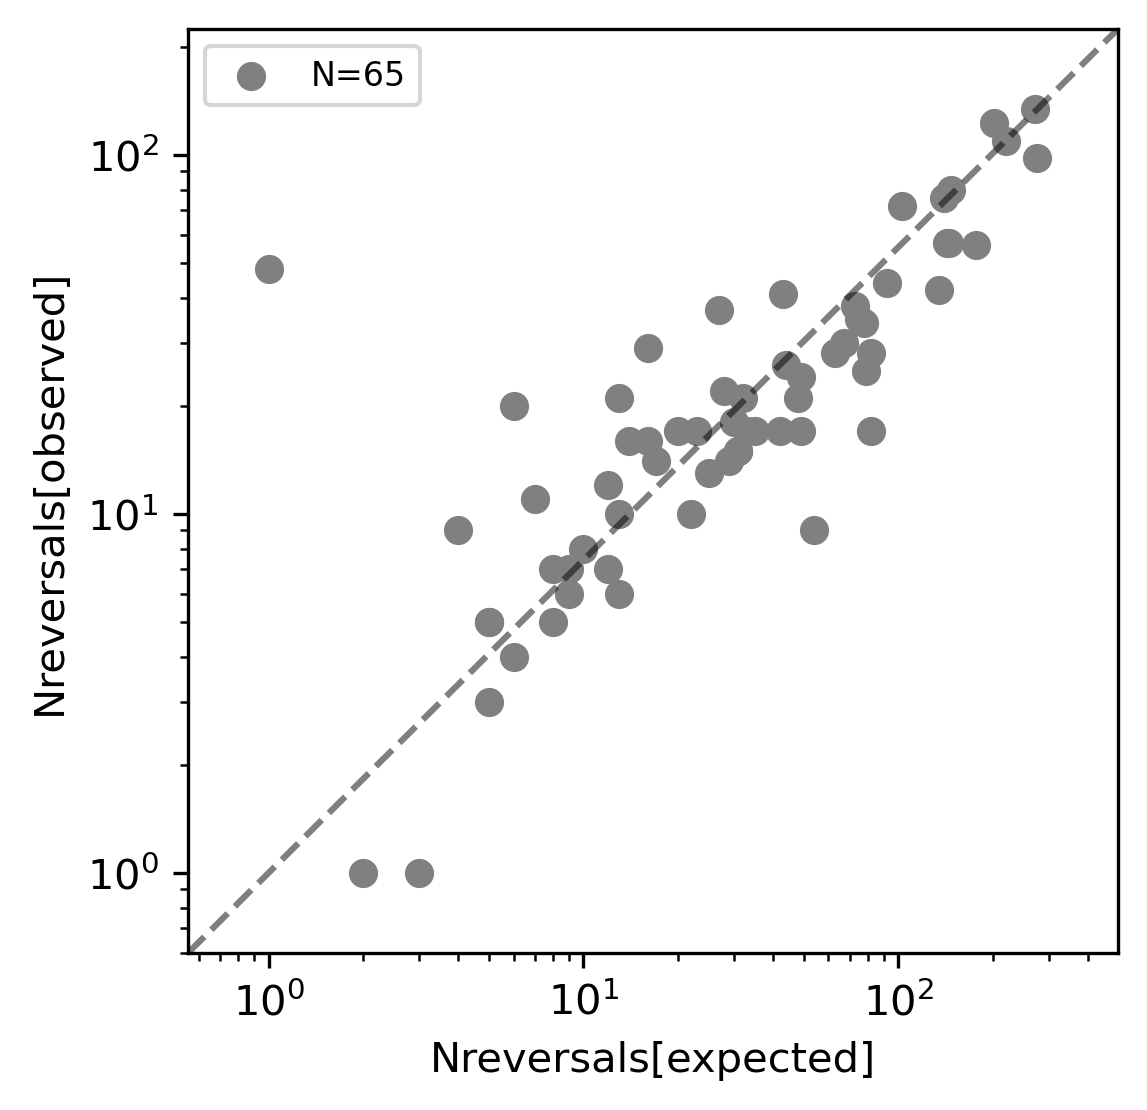

In [54]:
########
## PLOT ACTUAL REVERSAL AGAINST EXPECTED REVERSAL - ALL CASES
######

#get Nreversal, expected and actual
Nexpected_subset = np.copy(summaryStats[:,4])
Nactual_subset = np.copy(summaryStats[:,5])

#re-calculate Nexpected
for i in range(0,len(Nexpected_subset)):
    if Nexpected_subset[i] != np.nan:
        D_to_travel = summaryStats[i,3] - summaryStats[i,2]
        speedToUse = np.min([summaryStats[i,6],1.0])
        t_to_travel = D_to_travel / speedToUse
        obsDuration = summaryStats[i,15]
        Nexpected_subset[i] = np.round(obsDuration / t_to_travel)

fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=300)
ax.scatter(Nexpected_subset,Nactual_subset,color='gray',label = 'N=65')
#ax.scatter(summaryStats[:,4],summaryStats[:,5],color='gray')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Nreversals[expected]')
ax.set_ylabel('Nreversals[observed]')
ax.axline([ax.get_xlim()[0], ax.get_ylim()[0]], [ax.get_xlim()[1], ax.get_ylim()[1]],color='k',alpha=0.5,linestyle="--")
ax.legend(loc="upper left",fontsize=8)

#fig.savefig(path_root+'/figs_and_vids/Nreversals_expected.pdf')
plt.show()
plt.close(fig)